In [1]:
# Carregando Bibliotecas Python
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

# Análise Exploratória dos Dados

In [2]:
dataset = pd.read_csv('teste_indicium_precificacao.csv')
dataset.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


Número de linahs e colunas

In [3]:
dataset.shape

(48894, 16)

Tipo dos dados

In [4]:
dataset.dtypes

,0
id,int64
nome,object
host_id,int64
host_name,object
bairro_group,object
bairro,object
latitude,float64
longitude,float64
room_type,object
price,int64


Quantidade de dados faltantes

In [5]:
dataset.isna().sum()

,0
id,0
nome,16
host_id,0
host_name,21
bairro_group,0
bairro,0
latitude,0
longitude,0
room_type,0
price,0


Como a maioria dos dados faltantes refere a usuários que não estão utilizando a plataforma ultimamente, vou excluir esses dados do dataset

In [6]:
#excluindo dados faltantes
dataset.dropna(inplace = True)

In [7]:
dataset.isna().sum()

,0
id,0
nome,0
host_id,0
host_name,0
bairro_group,0
bairro,0
latitude,0
longitude,0
room_type,0
price,0


In [8]:
dataset.shape

(38820, 16)

Verificando Outliers

Vou verificar os outliers das colunas necessárias para fazer a análise de dados proposta no desafio. Ou seja, as colunas: price, minimo_noites e disponiblidade_365

In [9]:
dataset.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,3.882000e+04,3.882000e+04,38820.000000,38820.000000,38820.000000,38820.000000,38820.000000,38820.000000,38820.000000,38820.000000
mean,1.810127e+07,6.424747e+07,40.728131,-73.951148,142.332354,5.869346,29.290778,1.373259,5.166589,114.879856
std,1.069347e+07,7.589779e+07,0.054990,0.046693,196.997290,17.389233,48.183410,1.680339,26.303293,129.525398
min,2.595000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.722029e+06,7.032517e+06,40.688640,-73.982462,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887339e+07,2.837143e+07,40.721710,-73.954805,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756792e+07,1.019092e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Outliers de price

<Axes: ylabel='price'>

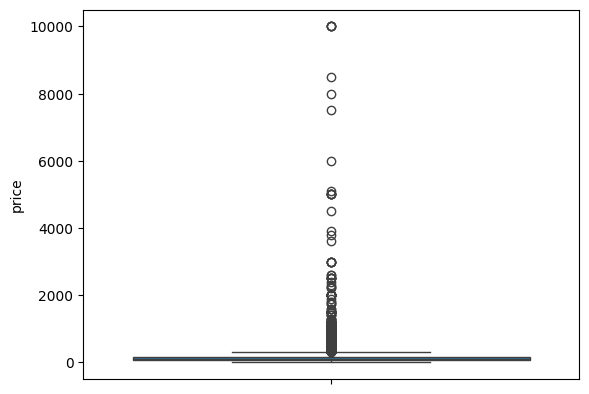

In [10]:
import seaborn as sns
sns.boxplot(y=dataset['price'])

Outliers de minimo_noites

<Axes: ylabel='minimo_noites'>

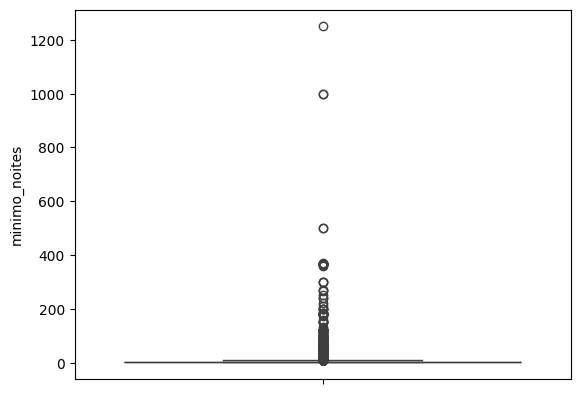

In [11]:
import seaborn as sns
sns.boxplot(dataset['minimo_noites'])

Outliers de reviews

<Axes: ylabel='numero_de_reviews'>

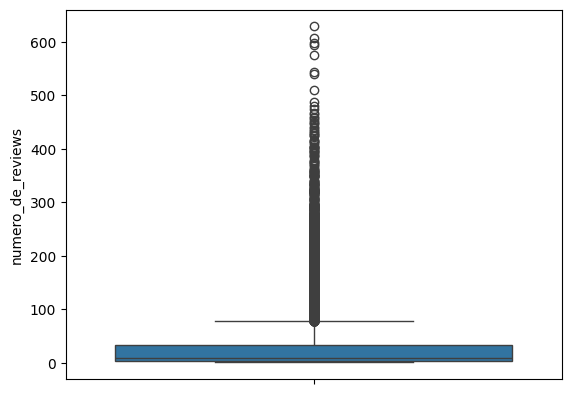

In [12]:
import seaborn as sns
sns.boxplot(dataset['numero_de_reviews'])

Outliers de disponibilidade_365

<Axes: ylabel='disponibilidade_365'>

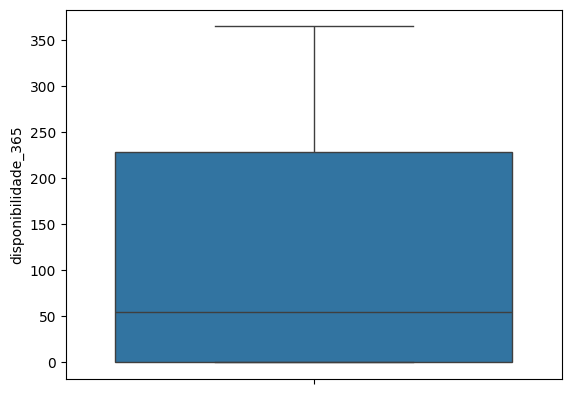

In [13]:
import seaborn as sns
sns.boxplot(dataset['disponibilidade_365'])

Removendo outliers de prices

In [14]:
dataset_analise = dataset.copy()

Q1_prices = dataset_analise['price'].quantile(.25) # quantile Q1
Q3_prices = dataset_analise['price'].quantile(.75) # quantile Q3

IQR_prices = Q3_prices - Q1_prices

limite_inferior_prices = Q1_prices - 1.5*IQR_prices
limite_superior_prices = Q3_prices + 1.5*IQR_prices

filtro_prices = (dataset_analise['price'] < limite_inferior_prices) | (dataset_analise['price'] > limite_superior_prices)
dataset_analise[filtro_prices]['price']

,price
60,375
84,800
102,500
113,350
115,325
...,...
47735,595
47926,599
47949,800
48117,350


Removendo outliers de minimo_noites

In [15]:
dataset_analise = dataset.copy()

Q1_prices = dataset_analise['minimo_noites'].quantile(.25) # quantile Q1
Q3_prices = dataset_analise['minimo_noites'].quantile(.75) # quantile Q3

IQR_prices = Q3_prices - Q1_prices

limite_inferior_prices = Q1_prices - 1.5*IQR_prices
limite_superior_prices = Q3_prices + 1.5*IQR_prices

filtro_minimo_noites = (dataset_analise['minimo_noites'] < limite_inferior_prices) | (dataset_analise['minimo_noites'] > limite_superior_prices)
dataset_analise[filtro_minimo_noites]['minimo_noites']

,minimo_noites
3,10
5,45
13,90
26,10
28,14
...,...
47905,30
48023,21
48202,30
48485,9


In [16]:
Q1 = dataset_analise['numero_de_reviews'].quantile(.25) # quantile Q1
Q3 = dataset_analise['numero_de_reviews'].quantile(.75) # quantile Q3

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5*IQR
limite_superior = Q3 + 1.5*IQR

filtro_numero_reviews = (dataset_analise['numero_de_reviews'] < limite_inferior) | (dataset_analise['numero_de_reviews'] > limite_superior)
dataset_analise[filtro_numero_reviews]['numero_de_reviews']

,numero_de_reviews
2,270
6,430
7,118
8,160
10,188
...,...
40024,86
40035,98
40296,95
42074,156


In [17]:
dataset_analise = dataset_analise[~filtro_prices]

In [18]:
dataset_analise = dataset_analise[~filtro_minimo_noites]

<ipython-input-18-66cd2b423b1d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset_analise = dataset_analise[~filtro_minimo_noites]


In [19]:
dataset_analise = dataset_analise[~filtro_numero_reviews]

<ipython-input-19-9809e9940e75>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset_analise = dataset_analise[~filtro_numero_reviews]


In [20]:
dataset_analise.reset_index(drop=True, inplace=True)

<Axes: ylabel='price'>

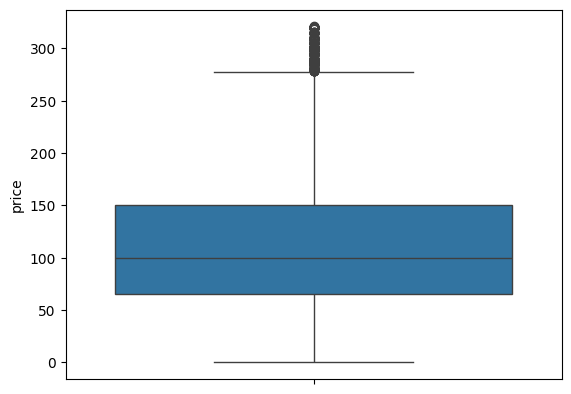

In [21]:
sns.boxplot(dataset_analise['price'])

<Axes: ylabel='minimo_noites'>

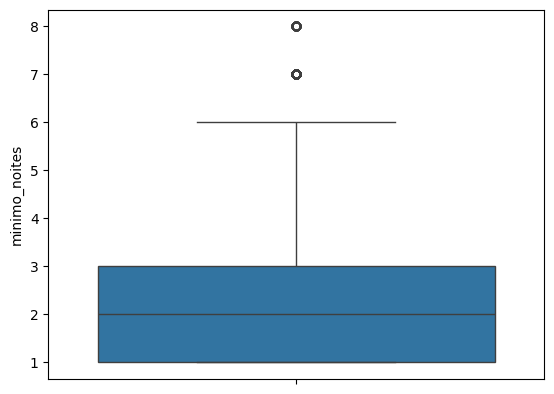

In [22]:
sns.boxplot(dataset_analise['minimo_noites'])

<Axes: ylabel='numero_de_reviews'>

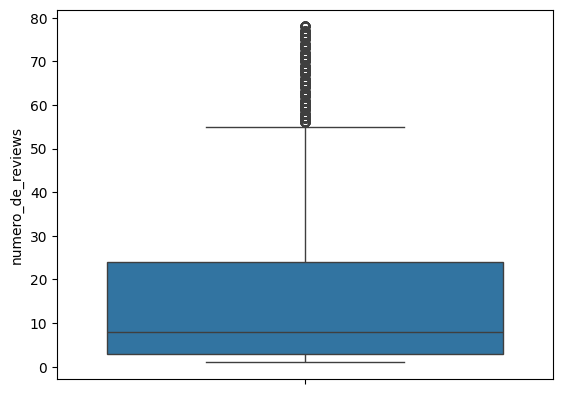

In [23]:
sns.boxplot(dataset_analise['numero_de_reviews'])

# Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

Para responder essa pergunta, irei fazer uma análise do preço dos alugueis conforme a coluna bairro_group.

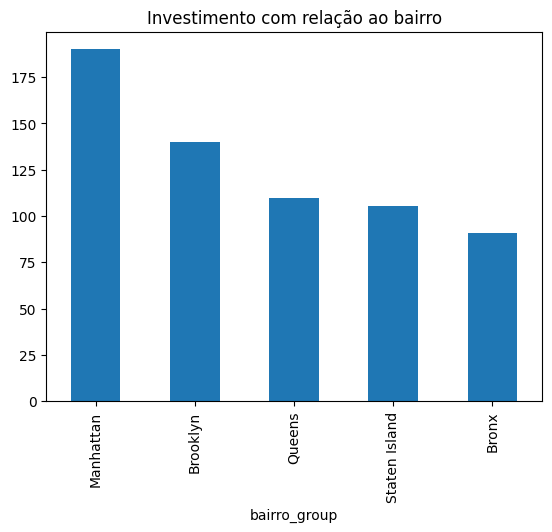

In [37]:
#cinco melhores bairros para se investir
beneficio_local = dataset_analise.groupby(['bairro_group'])['price'].quantile('.75').sort_values(ascending=False)
plt.title('Investimento com relação ao bairro')
beneficio_local.plot(kind='bar')
plt.show()

# O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?


Primeiramente, vou analisar o valor do aluguel pelo mínimo de noites e depois pela disponibilidade. Acho melhor fazer dessa forma para organizar melhor a análise

In [25]:
#coeficiente de correlação de pearson entre minimo_noites e price
price_min_noites = dataset_analise['minimo_noites'].corr(dataset['price'])
print('Coeficiente de Correlação de Pearson entre mínimo noites e price: ',price_min_noites)

Coeficiente de Correlação de Pearson entre mínimo noites e price:  0.010856109958793927


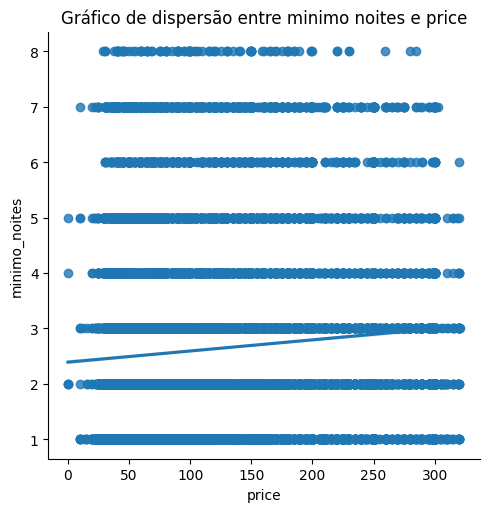

In [26]:
# gráfico de dispersão
sns.lmplot(x='price', y='minimo_noites', data=dataset_analise)
plt.title('Gráfico de dispersão entre minimo noites e price')
plt.show()

Como no coeficente de Correlação de Pearson entre minimo_noites e price tende à 1 ,um indica que existe correlação. Então, minimo_noites influencia, mesmo que pouco, no valor do preço do aluguel.
O gráfico de dispersão demonstra o resultado da correlação

In [27]:
#coeficiente de correlação de pearson entre disponiblidade de dias e price
price_disponiblidade = dataset['disponibilidade_365'].corr(dataset['price'])
print('Coeficiente de Correlação de Pearson entre disponiblidade e price: ',price_min_noites)

Coeficiente de Correlação de Pearson entre disponiblidade e price:  0.010856109958793927


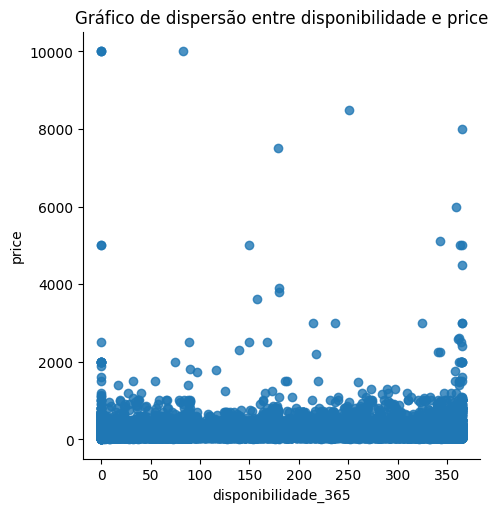

In [28]:
# gráfico de dispersão
sns.lmplot(x='disponibilidade_365', y='price', data=dataset)
plt.title('Gráfico de dispersão entre disponibilidade e price')
plt.show()

Como no coeficente de Correlação de Pearson entre minimo_noites e price tende à 1 ,um indica que existe correlação. Então, disponiblidade_365 influencia, mesmo que pouco, no valor do preço do aluguel. O gráfico de dispersão demonstra o resultado da correlação

# Existe algum padrão no texto do nome do local para lugares de mais alto valor?


In [40]:
lugares_alto_valor = dataset_analise.groupby(['bairro_group'])['price'].mean().sort_values(ascending=False).head()
lugares_alto_valor.index.str.extract(r'(\d+[a-zA-Z]+)')

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


Não existe padrão no texto do local para lugares de alto valor

# Aplicando o algoritmo de regressão linear múltipla

In [30]:
dataset_analise.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,2.850300e+04,2.850300e+04,28503.000000,28503.000000,28503.000000,28503.000000,28503.000000,28503.000000,28503.000000,28503.000000
mean,1.957458e+07,6.874452e+07,40.727183,-73.948879,117.516753,2.629092,16.460864,1.214463,3.555801,94.803986
std,1.042286e+07,7.823913e+07,0.056494,0.048039,65.830157,1.637621,18.920677,1.491967,23.167012,123.740203
min,2.595000e+03,2.787000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,1.040438e+07,8.113053e+06,40.687860,-73.980920,65.000000,1.000000,3.000000,0.180000,1.000000,0.000000
50%,2.078847e+07,3.254081e+07,40.719680,-73.953160,100.000000,2.000000,8.000000,0.640000,1.000000,23.000000
75%,2.884348e+07,1.116652e+08,40.762975,-73.931670,150.000000,3.000000,24.000000,1.730000,2.000000,173.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,321.000000,8.000000,78.000000,20.940000,327.000000,365.000000


Valores úncos de room_type

In [31]:
dataset_analise['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

Valores únicos de bairro_group

In [32]:
dataset_analise['bairro_group'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

Como forma de melhorar o resultado do modelo, vou trocar os valores das colunas room_type e bairro_group por números. A seguir está o índice do valor das mesmas:  

room_type = 1: 'Entire home/apt', room_type = 2: 'Private room', room_type = 3: 'Shared romm'

bairro group = 1: 'Manhattan', bairro_group = 2: 'Brooklyn', bairro_group =3 :'Queens', bairro_group = 4: 'State Island e bairro_group = 5: 'Bronx'  

In [33]:
dataset_prev = dataset_analise.copy()

#modificando o valor da room_type
def transformar_room_type(x):
    if(x == 'Entire home/apt'):
        return 1
    elif(x == 'Private room'):
      return 2
    else:
      return 3

#modificando o valor do bairro_group
def transformar_bairro_group(x):
    if(x == 'Manhattan'):
        return 1
    elif(x == 'Brooklyn'):
      return 2
    elif(x == 'Queens'):
      return 3
    elif(x == 'State Island'):
      return 4
    else:
      return 5

dataset_prev['room_type'] = dataset_prev['room_type'].apply(transformar_room_type)
dataset_prev['bairro_group'] = dataset_prev['bairro_group'].apply(transformar_bairro_group)

dataset_prev.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,1,Midtown,40.75362,-73.98377,1,225,1,45,2019-05-21,0.38,2,355
1,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,1,Murray Hill,40.74767,-73.97500,1,200,3,74,2019-06-22,0.59,1,129
2,5295,Beautiful 1br on Upper West Side,7702,Lena,1,Upper West Side,40.80316,-73.96545,1,135,5,53,2019-06-22,0.43,1,6
3,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,2,Crown Heights,40.67592,-73.94694,1,99,3,53,2019-06-22,4.44,1,21
4,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,2,Williamsburg,40.71842,-73.95718,1,299,3,9,2011-12-28,0.07,1,0


In [34]:
dataset_prev

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,1,Midtown,40.75362,-73.98377,1,225,1,45,2019-05-21,0.38,2,355
1,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,1,Murray Hill,40.74767,-73.97500,1,200,3,74,2019-06-22,0.59,1,129
2,5295,Beautiful 1br on Upper West Side,7702,Lena,1,Upper West Side,40.80316,-73.96545,1,135,5,53,2019-06-22,0.43,1,6
3,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,2,Crown Heights,40.67592,-73.94694,1,99,3,53,2019-06-22,4.44,1,21
4,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,2,Williamsburg,40.71842,-73.95718,1,299,3,9,2011-12-28,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28498,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,1,Upper East Side,40.78099,-73.95366,2,129,1,1,2019-07-07,1.00,1,147
28499,36427429,No.2 with queen size bed,257683179,H Ai,3,Flushing,40.75104,-73.81459,2,45,1,1,2019-07-07,1.00,6,339
28500,36438336,Seas The Moment,211644523,Ben,5,Great Kills,40.54179,-74.14275,2,235,1,1,2019-07-07,1.00,1,87
28501,36442252,1B-1B apartment near by Metro,273841667,Blaine,5,Mott Haven,40.80787,-73.92400,1,100,1,2,2019-07-07,2.00,1,40


In [35]:
dataset_prev[['latitude', 'longitude', 'bairro_group', 'room_type','calculado_host_listings_count','minimo_noites','numero_de_reviews', 'reviews_por_mes', 'disponibilidade_365','price']].corr()

,latitude,longitude,bairro_group,room_type,calculado_host_listings_count,minimo_noites,numero_de_reviews,reviews_por_mes,disponibilidade_365,price
latitude,1.000000,0.100456,-0.192487,0.035450,-0.019956,-0.005719,-0.009568,-0.003396,-0.047935,0.052288
longitude,0.100456,1.000000,0.472724,0.155108,-0.077266,-0.107229,0.075253,0.143385,0.155856,-0.297241
bairro_group,-0.192487,0.472724,1.000000,0.115408,-0.059630,-0.079611,0.062560,0.107481,0.179554,-0.294264
room_type,0.035450,0.155108,0.115408,1.000000,-0.039002,-0.177931,-0.005338,0.027667,0.121511,-0.618178
calculado_host_listings_count,-0.019956,-0.077266,-0.059630,-0.039002,1.000000,-0.031729,-0.032466,0.044908,0.143460,0.110744
minimo_noites,-0.005719,-0.107229,-0.079611,-0.177931,-0.031729,1.000000,-0.089425,-0.236090,-0.080534,0.080731
numero_de_reviews,-0.009568,0.075253,0.062560,-0.005338,-0.032466,-0.089425,1.000000,0.451710,0.230190,-0.014310
reviews_por_mes,-0.003396,0.143385,0.107481,0.027667,0.044908,-0.236090,0.451710,1.000000,0.233601,-0.024313
disponibilidade_365,-0.047935,0.155856,0.179554,0.121511,0.143460,-0.080534,0.230190,0.233601,1.000000,0.018616
price,0.052288,-0.297241,-0.294264,-0.618178,0.110744,0.080731,-0.014310,-0.024313,0.018616,1.000000


In [36]:
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = dataset_prev[['latitude', 'longitude','bairro_group','room_type','calculado_host_listings_count', 'minimo_noites', 'disponibilidade_365']]
Y = dataset_prev['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
X = model.fit(X_train, Y_train)

perfil_cliente_indicium = pd.DataFrame({
 'latitude': [40.75362],
 'longitude': [-73.98377],
 'bairro_group': [1], #Manhattan
 'room_type': [1], #Entire home/apt
 'calculado_host_listings_count': [2],
 'minimo_noites': [1],
 'disponibilidade_365': [355]}
)

y_prev = model.predict(X_test)

prev_teste = model.predict(perfil_cliente_indicium)

mse = mean_squared_error(Y_test, y_prev)
r2 = r2_score(Y_test, y_prev)

print("Erro Quadrático Médio (MSE):", mse)
print("Coeficiente de Determinação (R²):", r2)
print('Previsão do perfil do cliente passado na questão: ', prev_teste)

with open('modelo.pkl', 'wb') as file:
  pickle.dump(model, file)

Erro Quadrático Médio (MSE): 2293.1268765631266
Coeficiente de Determinação (R²): 0.48008230605349445
Previsão do perfil do cliente passado na questão:  [197.07574333]
